# Algorithmes
[^Goodfellow_et_al]
[^Goodfellow_et_al]: Deze sectie is gebaseerd op [Goodfellow et al. (2016, 96-107)](https://www.deeplearningbook.org/front_matter.pdf).

Een machine learning algorithme is een algorithme dat kan leren van data. Maar wat verstaan we juist onder "**leren**"?  
  
_“A computer program is said to learn from experience E with respect to some class of tasks T and performance measure P , if its performance at tasks in T , as measured by P , improves with experience E.”_ [Mitchell (1997)](https://www.cs.cmu.edu/~tom/files/MachineLearningTomMitchell.pdf)  
  
Vrij vertaald:  
**Er wordt gezegd dat een computerprogramma leert van ervaring _E_ met betrekking tot een bepaalde klasse van taken _T_ en een prestatiemaat _P_, als zijn prestatie op taken in _T_, gemeten door _P_, verbetert met ervaring _E_.**

### Taken, _T_
De taak is wat het machine learning model uiteindelijk moet kunnen doen. Dat zijn meer specifiek taken die te complex zijn om op te lossen met een vaste programmeerbare logica.
Vaak voorkomende taken zijn:
#### Klassificatie (_Classification_)
Bij klassificatie is het de bedoeling om discrete labels toe te wijzen aan data. Denk aan het labelen van e-mails als "spam" of "geen spam", of het herkennen van verschillende soorten dieren/voorwerpen op foto's.  
  
[![](https://scikit-learn.org/stable/_images/sphx_glr_plot_classifier_comparison_001.png)](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py)  
#### Regressie
Hier is het doel om een continue, numerieke waarde te voorspellen. Voorbeelden zijn het voorspellen van huizenprijzen, aankomsttijden (ETA's), de temperatuur van morgen of de aandelenkoers.  
  
[![](https://scikit-learn.org/stable/_images/sphx_glr_plot_tree_regression_001.png)](https://scikit-learn.org/stable/modules/tree.html#regression)
#### Transcriptie
Bij dit type taak moet het model (relatief) ongestructureerde data vertalen naar een discrete, tekstuele vorm. Bijvoorbeeld, bij _optical character recognition_ krijgt het computerprogramma een foto met een afbeelding van geschreven of getypte tekst te zien en wordt het gevraagd deze tekst terug te geven in de vorm van een reeks karakters. _Speech-to-text_ behoren ook tot dit type.  
  
[![Hugging Face Spaces](https://img.shields.io/badge/%F0%9F%A4%97%20Hugging%20Face-Spaces-blue)](https://huggingface.co/spaces/openai/whisper)
#### Automatische vertaling
Dit is een klassieke taak binnen het domein van _Natural Language Processing (NLP)_ waarbij tekst uit de ene natuurlijke taal naar de andere vertaald moet worden.
#### Clustering
Het groeperen van vergelijkbare data-punten. Denk aan het groeperen van klanten in segmenten op basis van hun koopgedrag.   

[![](https://scikit-learn.org/stable/_images/sphx_glr_plot_kmeans_digits_001.png)](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#visualize-the-results-on-pca-reduced-data) 
#### Dimensionaliteitsreductie
In bepaalde toepassingen willen we het model gebruiken om hoog-dimensionele data (met veel features in de kolommen van $\pmb{X}$) _compresseren_ in een lager dimensionele ruimte _met behoud van relevante afstanden tussen de data in de originele ruimte_ (waarbij afstand op veel verschillende wiskundige manieren gedefinieerd kan zijn).  
  
[![](../../../img/tf_projector_mnist.png)](https://projector.tensorflow.org/)
#### Anomaliedetectie
In deze taak is het de bedoeling om in een reeks events of objecten ongewone of atypische voorbeelden te detecteren. Een voorbeeld is het detecteren van kredietkaartfraude. Door iemands gewoonlijke aankoopgedrag te modelleren, kunnen banken bij plotse afwijkingen misbruik detecteren (en bv. kaarten blokkeren).

[![](https://scikit-learn.org/stable/_images/sphx_glr_plot_anomaly_comparison_001.png)](https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_anomaly_comparison.html)
#### Generatie
Het voorbije decennium hebben we een enorme doorbraak gekend van zogenaamde _generatieve modellen_, zowel in het domein van beeld als van (natuurlijke en programeer-)talen.
  
[![](https://docs.pytorch.org/tutorials/_images/sphx_glr_dcgan_faces_tutorial_003.png)](https://docs.pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html)

#### Actie planning
Bij deze taak is het de bedoeling om optimale _sequenties_ van model outputs te leren, met het oog op een bepaald doel.

[![](https://docs.pytorch.org/tutorials/_images/mario.gif?raw=true)](https://docs.pytorch.org/tutorials/intermediate/mario_rl_tutorial.html)

### Ervaring, _E_

Afhankelijk van de manier waarop ervaring kan opgedaan worden tijdens het leerproces, zijn drie grote families leeralgoritmes: **_supervised_**, **_unsupervised_** en **_reinforcement learning_**. Meer specifiek, verschillen ze van elkaar naargelang de manier waarop het leerproces gestuurd wordt richting de gewenste _model outputs_. De **model output heeft betrekking op de specifieke predicties en/of acties die op basis van het model gemaakt zullen worden**.

#### _Supervised learning_
**Bij _supervised learning_ is het de bedoeling dat het model leert om, bij een gegeven input, een specifieke output te geven die vooraf bepaald is**. In de training data zijn zogenaamde **ground truth values/labels** aanwezig. Die geven voor iedere individuele set van input features aan wat de gewenste (_target_) output is. _Ground truth_ data verzamelen/bepalen vraagt soms een aanzienlijke (soms 100% manuele) inspanning. Dat proces wordt **data annotatie genoemd**. _Supervised learning_ is vaak heel efficiënt omdat, tijdens het trainen, aan iedere individuele output een score toegekend kan worden van waaruit een "richting" kan worden afgeleid in de zoektocht naar optimale parameterwaarden (zie Mathematical Foundations). Meer algemeen gesteld, kan er dus rechtstreeks geleerd (of ervaring opgedaan) worden over wat de gewenste model output moet zijn bij een bepaalde input.   
  
:::{note} 🌍 _Airco_
:icon: false
:class: simple
In ons simpel airco voorbeeld, zou ons ideale _getraind_ model, iedere geobserveerde waarde in de training data _en_ alle toekomstige observaties 
perfect moeten kunnen voorspellen. De eigenlijke observaties vormen dus de gewenste (_target_) waarden voor de model output. Het gaat hier dus over _supervised_ training.
:::

:::{note} 🌍 _CIFAR-10_
:icon: false
:class: simple
In de context van computer vision, is _supervised_ learning nog steeds de gouden standaard.
Een populaire publieke dataset in die context is de [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset.
De dataset bestaat uit RGB foto's met een resolutie van 32x32 pixels voor 10 categorieën (of **klassen**): 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'.  
De bedoeling is om een ML model te ontwikkelen dat toelaat om, bij een willekeurige nieuwe foto (met resolutie 32x32), te beslissen of het om één van de gegeven _classes_ gaat. 
De specifieke manier van modelleren zal aan bod komen in het Computer Vision hoofdstuk. Hier gaan we er enkel van uit dat er een model output $f(\pmb{x})$ zal zijn
die bij iedere nieuwe input het label 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck' of _'unknown'_ zal toekennen.  
  
Wanneer we hier op zoek gaan naar de ideale parameter waarden van het model, hebben we in de training data voor iedere observatie van 3x32x32 waarden ook de _gewenste_ model output $y_i$ ter beschikking. We kunnen in dat geval rechtstreeks een _Loss_ functie definiëren die daarmee rekening houdt zoals de _SSE loss_:
$$
J_{SSE}(f(\pmb{x}); \pmb{y}) = \sum_{i=1}^M(y_i-f(x_i))^2
$$
waarbij $y_i$ de numerieke feature voor de **ground truth** labels 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck' of 'unknown' voorstelt en $f(x_i)$ de eigenlijke model output.
  
Wanneer we dieper ingaan op _computer vision_ als toepassingsdomein zullen we zien dat in recente modellen, training nog steeds via _supervised_ learning gebeurt, maar meer en meer door _self-supervision_ in plaats van (kostelijke) voorafgaande annotatie.
:::

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
from torchvision import transforms

100%|██████████| 170M/170M [00:12<00:00, 14.1MB/s] 


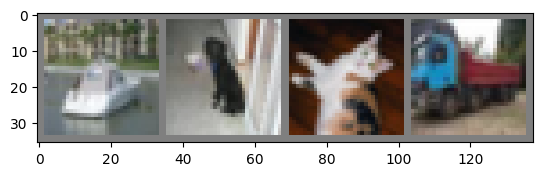

ship  dog   cat   truck


In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

batch_size = 4

trainset = torchvision.datasets.CIFAR10(
    root="./data", train=True, download=True, transform=transform
)
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=batch_size, shuffle=True, num_workers=2
)

testset = torchvision.datasets.CIFAR10(
    root="./data", train=False, download=True, transform=transform
)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=batch_size, shuffle=False, num_workers=2
)

classes = ("plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")


def imshow(img):
    """
    Display an image tensor after unnormalizing it.

    Args:
        img (torch.Tensor): Image tensor to display.
    """
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(" ".join(f"{classes[labels[j]]:5s}" for j in range(batch_size)))

#### _Unsupervised learning_

**Bij _unsupervised learning_ is ervaring gebasseerd op pure blootstelling aan data**. In tegenstelling tot _supervised learning_, is er op voorhand géén informatie beschikbaar over de gewenste model output bij een gegeven input. Het is niet mogelijk om parameterwaarden te optimaliseren aan de hand van scores die het verschil uitdrukken tussen de ouput van het model en de gewenste output (_targets_). Het leeralgortime heeft als doel om (multi-dimensionele) inputs te vertalen naar éénvoudigere structureren. Die structuren blijven _ongelabeled_; de interpretatie (betekenis) van de structuur is geen onderdeel van de model output. Een klassiek voorbeeld zijn _Kohonen's Self-Organizing Maps (SOM)_ een specifieke vorm van _competitief leren_.  

:::{note} 🌍 2D Kleurkaart
:icon: false
:class: simple

Hier demonstreren we het principe van __unsupervised learning__ met behulp van een _Kohonen Self-Organizing Map (SOM)_. We zullen zien dat we aan de hand van een _competitief leeralgorithme_ een model kunnen trainen dat een 3D kleurruimte (RGB) vertaalt naar een 2D kleurkaart (waarbij de originele afstand tussen kleuren in 3D zoveel mogelijk behouden blijft). Het gaat dus om dimensionaliteitsreductie als taak. Om de performantie van de oplossing  te scoren zullen we gebruik maken van de _quantization error_. Merk op dat er geen _Loss_ functie gebruikt wordt tijdens het trainen.

1. Data Generatie

We creëren een dataset met willekeurige RGB-kleurvectoren. Elke kleur is een vector met drie waarden (Rood, Groen, Blauw), die elk variëren van 0 tot 1.
:::

In [3]:
from minisom import MiniSom

In [4]:
def rgbn():
    """
    Generate a random normalized RGB color vector.

    Returns
    -------
        np.ndarray: A 3-element array representing a normalized RGB color.
    """
    rng = np.random.default_rng()  # random number generator
    r, g, b = rng.random(), rng.random(), rng.random()  # random RGB using Generator
    norm = np.sqrt(r * r + g * g + b * b)  # norm
    return np.array([r, g, b] / norm)  # normalized RGB

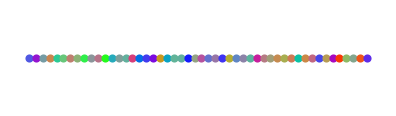

In [5]:
# Generate the input data: 1000 random RGB colors
# Each color is a vector of 3 floats (R, G, B) between 0 and 1.
n_colors = 1000
rng = np.random.default_rng()
input_data = [rgbn() for _ in range(n_colors)]

pls = plt.figure(figsize=(4, 1), dpi=120)
plt.axis("off")

for i in range(50):
    plt.scatter(i, 0, color=input_data[i], s=15)

plt.show()

:::{note} 🌍 2D Kleurkaart
:icon: false
:class: simple

2. Het Kohonen Netwerk (SOM)

Een Kohonen-netwerk is een _grid_ van artificiële neuronen. Elk neuron heeft een gewichtsvector met dezelfde dimensie als de invoergegevens. In ons geval is de gewichtsvector van elk knooppunt een array met 3 elementen die een RGB-kleur vertegenwoordigt. De gewichtvectoren van alle neuronen vormen de parameters van het model.

Een invoervector wordt vergeleken met alle gewichtsvectoren in het 2D-rooster. Het meest gelijkende neuron (de _Best Matching Unit (BMU)_) en zijn buren worden bijgewerkt.

```
   Invoervector [R, G, B]
         |
         |
         +--------------------+
         | Vergelijking met   |
         | alle gewichten     |
         v                    v
  +-----+-----+-----+-----+
  |  O  |  O  |  N  |  O  |   <-- 2D grid
  +-----+-----+-----+-----+
  |  O  |  N  | BMU |  N  |   O = Neuron
  +-----+-----+-----+-----+   BMU = Best Matching Unit
  |  O  |  O  |  N  |  O  |   N = Buur van de BMU
  +-----+-----+-----+-----+
  |  O  |  O  |  O  |  O  |
  +-----+-----+-----+-----+
```

Het trainingsproces werkt als volgt:
- Initialisatie: Gewichtsvectoren worden geïnitialiseerd met willekeurige kleuren.
- Competitie: Voor elke invoerkleur uit onze dataset zoekt het netwerk het neuron waarvan de gewichtsvector het meest vergelijkbaar is. Dit "winnende" neuron wordt de _Best Matching Unit (BMU)_ genoemd. De gelijkenis wordt doorgaans gemeten met de Euclidische afstand.
- Adaptatie: De gewichtsvector van de BMU wordt bijgewerkt om nog meer op de invoerkleur te lijken. De buren op het _grid_ worden ook bijgewerkt, maar in mindere mate. Dit is het "zelforganiserende" deel, omdat het aangrenzende neuronen aanmoedigt om vergelijkbare kleuren te representeren.

De performantie van het leeproces wordt afgetoest aan de _quantization error (QE)_ De QE is de gemiddelde afstand tussen elke invoervector en de gewichtsvector van zijn BMU. Het kwantificeert hoe getrouw de _map_ de invoergegevens representeert.

De formule is:
$$
QE=\frac{1}{N}\sum_{i=1}^N∣|\pmb{x_i}-\pmb{w_{c(i)}}∣|
$$
Waarbij:
- $N$ het totale aantal invoervectoren is.
- $\pmb{x_i}$ de i-de invoerkleurvector is.
- $\pmb{w_{c(i)}}$ de gewichtsvector van de BMU voor de invoer $\pmb{x_i}$ is.
- $∣|...|| de Euclidische afstand aangeeft.

Een dalende QE toont aan dat de neuronen van de _map_ steeds dichter bij de invoergegevens komen die ze representeren, wat betekent dat het netwerk een betere representatie aanleert.

3. Implementatie en Training
:::

In [6]:
# --- SOM Initialization ---
map_size = (40, 40)
# The SOM will have 3 features (R, G, B)
som = MiniSom(
    x=map_size[0],
    y=map_size[1],
    input_len=3,
    sigma=1.5,
    learning_rate=0.5,
    neighborhood_function="gaussian",
    random_seed=42,
)

# Initialize the weights randomly
som.random_weights_init(input_data)

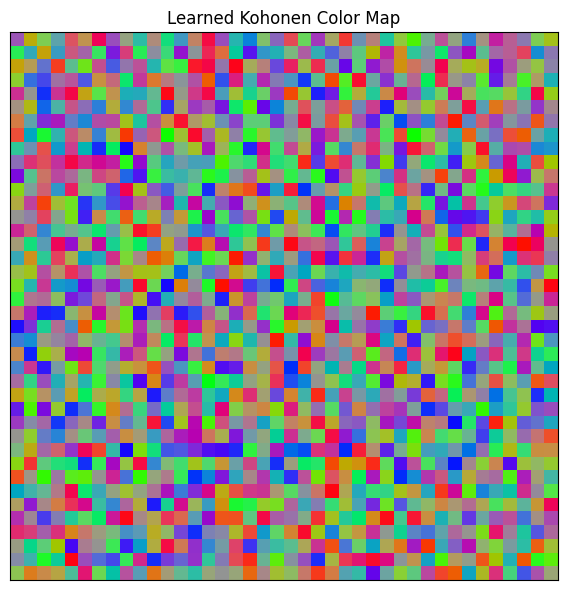

In [7]:
# Get the initial weights of the SOM
learned_map = som.get_weights()

# --- Plotting the results ---
fig = plt.figure(figsize=(12, 6))

# Plot the initial weights map
ax = fig.add_subplot()
ax.imshow(learned_map, interpolation="nearest")
ax.set_title("Learned Kohonen Color Map")
ax.set_xticks([])
ax.set_yticks([])

plt.tight_layout()
plt.show()

In [8]:
# --- Training the SOM ---
num_iterations = 1000
som.train(input_data, num_iterations, verbose=True)

num_iterations = 50000
som.train(input_data, num_iterations, verbose=True)

print("\nTraining complete.")

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.02702938248799072
 [ 50000 / 50000 ] 100% - 0:00:00 left 
 quantization error: 0.006253178938243978

Training complete.


:::{note} 🌍 2D Kleurkaart
:icon: false
:class: simple

3. Visualisatie kleurkaart
:::

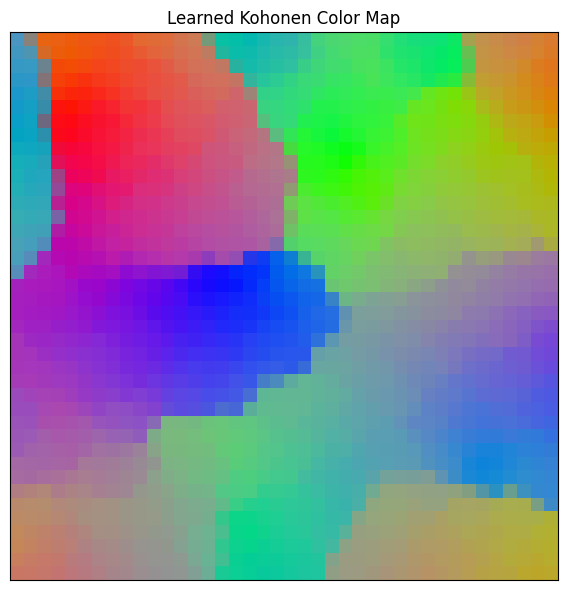

In [9]:
# Get the final weights of the SOM
# These weights are the learned color representations for each node
learned_map = som.get_weights()

# --- Plotting the results ---
fig = plt.figure(figsize=(12, 6))

# Plot the learned color map
ax = fig.add_subplot()
ax.imshow(learned_map, interpolation="nearest")
ax.set_title("Learned Kohonen Color Map")
ax.set_xticks([])
ax.set_yticks([])

plt.tight_layout()
plt.show()

#### Reinforcement learning
Bij _reinforcement learning_ is er tijdens het leren een interactie met een omgeving. Er is een _feedback loop_ tussen het model en de ervaring die het kan opdoen. Zoals bij _unsupervised learning_ is er **geen rechstreekse informatie** over iedere model output. Er is echter wel een **onrechstreekse inschatting van de wenselijkheid van een individuele output onder de vorm van een zgn. _reward_ functie**. Deze familie van leeralgorithmes wordt gebruikt in de context van **actie-planning** taken toepassingen waarbij model outputs de vorm hebben van **sequentiële acties** binnen een al dan niet gesimuleerde **omgeving**. Er wordt _geen_ rechstreekse evaluatie gedaan van actie-sequenties ten op zichte van overeenkomstige targets, maar de uitkomst van actie-sequenties wordt wel gescoord ten op zichte van vooraf gedefiniëerde doelstellingen binnen de omgeving. Die scoring gebeurt via de _reward_ functie. In het hoofdstuk over Robotics zullen we dieper ingaan op verschillende vormen van [_reinforcement learning_](https://docs.pytorch.org/tutorials/intermediate/reinforcement_q_learning.html).  
  
[![](https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit1/RL_process_game.jpg)](https://huggingface.co/learn/deep-rl-course/en/unit1/rl-framework)

### Performantiemaat, _P_
🚧